## To install:
`pip3 install git+https://github.com/gtcanalytics/randl_client`

In [1]:
import randl_client

#### Create an instance of the driver class

In [2]:
randl = randl_client.Randl()

#### Set your API key

In [8]:
randl.api_key = "your_api_key"

In [10]:
randl.api_key = "e2304zgk2lfi4"

#### Check current RaNDL version by querying server

In [6]:
randl.version()

'1.0.2'

### To check current Randl client settings:

In [9]:
randl

RaNDL Client - Version:0.1.6

Server URL:	http://seismic-ai.com:8011/randl/
API Key:	your_api_key

-Bulletin Parameters-
Start:		2024-05-01T00:00:00
End:		2024-05-11T00:00:00
Stations:	100
Events:		1
Drop fraction:	0.2
Seed:		555

-Window Parameters-
Start:			2024-05-10 18:43:15.431390
Length:			1800
Min_phases:		5
Exclude associated:	False

-DML Parameters-
Models:		['pwave']
Sampling:	['full']
Num_samples:	10
Num_stations:	5
Arids:		['None']
Pwave_model:	None
Baz_model:	None
Exclude stations:True

-Beamsearch Parameters-
Beam width:	5
Max dist:	5000
Max time:	500
Sequence dist:	500
Sequence time:	500
-Octree parameters-
Octree time spacing:	15
Octree time threshold:	10
Octree time samples:	11
Octree loc spacing:	0.017
Octree loc samples:	11
Octree max iterations:	3

### Function calls and setters - Single event example
#### Synthetic bulletin generation parameters

`randl.set_bulletin_start('timestamp')`

`randl.set_bulletin_end('timestamp')`

`randl.set_bulletin_n_stations(int)`

`randl.set_bulletin_n_events(int)`

`randl.set_bulletin_drop_fraction(float)`

`randl.set_bulletin_seed(int)`

#### Synthetic bulletin generation setup

In [11]:
randl.set_bulletin_start('2024-05-01T00:00:00')
randl.set_bulletin_end('2024-05-01T2:30:00')
randl.set_bulletin_n_stations(50)
randl.set_bulletin_n_events(1)
randl.set_bulletin_drop_fraction(0.2)
randl.set_bulletin_seed(42)


#### Querying backend to generate synthetic bulletin

In [13]:
bulletin = randl.create_bulletin()
bulletin

,STA,LAT_STA,LON_STA,ARID,TIME_ARRIV,IPHASE,ORID,ORIG_TIME,ORIG_LAT,ORIG_LON,ORIG_DEPTH,BACK_AZIMUTH
0,9,37.453064,-62.881081,0,2024-05-01 00:07:38.858977,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0
1,28,16.634622,-50.952338,1,2024-05-01 00:08:16.848431,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0
2,35,55.511523,-62.934004,2,2024-05-01 00:10:29.289896,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0
3,7,65.911706,-109.446170,3,2024-05-01 00:12:56.678668,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0
4,45,29.254011,-2.233585,4,2024-05-01 00:13:53.016421,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0
5,34,83.813766,-68.046364,5,2024-05-01 00:14:07.981206,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0
6,11,84.583773,-82.314349,6,2024-05-01 00:14:14.552176,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0
7,39,-10.772551,-10.002627,7,2024-05-01 00:14:50.286249,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0
8,33,80.799397,-157.118994,8,2024-05-01 00:14:50.979293,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0
9,43,73.677672,22.059791,9,2024-05-01 00:14:53.244298,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0


#### Windowing parameters

`randl.set_window_start('timestamp')`

`randl.set_window_length(int)`

`randl.set_window_phases_required(int)`

`randl.set_window_exclude_associated_phases(Boolean)`

### Windowing setup
This is for a 30 minute window starting at the first arrival in the bulletin

In [14]:
randl.set_window_start(bulletin.loc[0,"TIME_ARRIV"])
randl.set_window_length(1800)
randl.set_window_phases_required(5)
randl.set_window_exclude_associated_phases(False)

#### Querying backend to select a window of arrivals

In [15]:
window = randl.window_catalog(bulletin)
window

,STA,LAT_STA,LON_STA,ARID,TIME_ARRIV,IPHASE,ORID,ORIG_TIME,ORIG_LAT,ORIG_LON,ORIG_DEPTH,BACK_AZIMUTH,assoc_id
0,9,37.453064,-62.881081,0,2024-05-01 00:07:38.858977,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0,-1
1,28,16.634622,-50.952338,1,2024-05-01 00:08:16.848431,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0,-1
2,35,55.511523,-62.934004,2,2024-05-01 00:10:29.289896,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0,-1
3,7,65.911706,-109.446170,3,2024-05-01 00:12:56.678668,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0,-1
4,45,29.254011,-2.233585,4,2024-05-01 00:13:53.016421,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0,-1
5,34,83.813766,-68.046364,5,2024-05-01 00:14:07.981206,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0,-1
6,11,84.583773,-82.314349,6,2024-05-01 00:14:14.552176,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0,-1
7,39,-10.772551,-10.002627,7,2024-05-01 00:14:50.286249,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0,-1
8,33,80.799397,-157.118994,8,2024-05-01 00:14:50.979293,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0,-1
9,43,73.677672,22.059791,9,2024-05-01 00:14:53.244298,P,0,2024-05-01 00:04:42.862671,24.553874,-66.831847,355.999484,0,-1


#### DML predictions parameters

`randl.set_dml_models(list).` Example: ['pwave', 'baz']

`randl.set_dml_sampling(list).` Example: ['kfn', 'knn', 'full', 'random']

`randl.set_dml_num_samples(int)`

`randl.set_dml_exclude_duplicate_stations(Boolean)`

`randl.set_dml_pwave_model("mlflow_model_path")` - For selecting a different custom model

`randl.set_dml_sta_count(int)` - Number of stations to be used per sample. Default is 5, but station counts of 3 or 4 may also be selected. This parameter determines which DML model is used, and all sampling is handled accordingly. 

#### DML Setup (default number of stations used is 5)

In [16]:
randl.set_dml_models(['pwave'])
randl.set_dml_sampling(['random'])
randl.set_dml_num_samples(50)
randl.set_dml_exclude_duplicate_stations(True)

#### Querying backend for DML predictions from the current window of arrivals

In [17]:
dml_predictions = randl.dml_prediction(window)
dml_predictions

,ARID,STA,sampling,features,p_anchors,source_X_unscaled,source_Y_unscaled,source_Z_unscaled,Time_unscaled,source_X_scaled,...,DEPTH_ORIG,Loc_uncertainty,T_uncertainty,Loc_uncertainty_unscaled,T_uncertainty_unscaled,x_std,y_std,z_std,model,TIME_ORIG
0,"[3, 9, 12, 1, 13]","[7, 43, 13, 28, 14]",random,"[-0.1362603701, 0.26127310870000003, 0.3853631...",2024-05-01 00:08:16.848431,2.105331e+06,-5.123183e+06,2.379822e+06,215.928903,0.330086,...,-346275.755132,0.969551,0.982767,194.209243,15.509555,0.045847,0.023218,0.022283,pwave,2024-05-01 00:04:40.919527778
1,"[2, 6, 12, 4, 9]","[35, 11, 13, 45, 43]",random,"[0.2582366608, 0.0126656521, 0.3853631395, 0.8...",2024-05-01 00:10:29.289896,2.130351e+06,-5.091843e+06,2.322842e+06,354.163760,0.334008,...,-386510.898267,0.971842,0.982825,179.594820,15.457567,0.042494,0.018318,0.023662,pwave,2024-05-01 00:04:35.126136053
2,"[9, 5, 3, 13, 6]","[43, 34, 7, 14, 11]",random,"[0.26127310870000003, 0.0404208755, -0.1362603...",2024-05-01 00:12:56.678668,2.079350e+06,-5.042303e+06,2.325564e+06,522.622633,0.326012,...,-445517.566677,0.947848,0.981476,332.632769,16.671877,0.088136,0.033412,0.034908,pwave,2024-05-01 00:04:14.056035020
3,"[8, 7, 12, 3, 11]","[33, 39, 13, 7, 1]",random,"[-0.1477932428, 0.9675577216000001, 0.38536313...",2024-05-01 00:12:56.678668,2.298311e+06,-4.939847e+06,2.472883e+06,494.308323,0.360342,...,-391201.413524,0.968906,0.987701,198.323893,11.069327,0.038384,0.030191,0.024708,pwave,2024-05-01 00:04:42.370345332
4,"[9, 8, 1, 11, 4]","[43, 33, 28, 1, 45]",random,"[0.26127310870000003, -0.1477932428, 0.6037680...",2024-05-01 00:08:16.848431,2.391480e+06,-5.083949e+06,2.155542e+06,217.878065,0.374950,...,-357733.474648,0.962137,0.963329,241.496383,33.004146,0.041796,0.030886,0.040908,pwave,2024-05-01 00:04:38.970366487
5,"[12, 1, 9, 6, 3]","[13, 28, 43, 11, 7]",random,"[0.3853631395, 0.6037680361000001, 0.261273108...",2024-05-01 00:08:16.848431,2.748085e+06,-4.891580e+06,2.185836e+06,225.279486,0.430860,...,-353893.128682,0.967317,0.981661,208.453491,16.504730,0.044469,0.031328,0.022251,pwave,2024-05-01 00:04:31.568944821
6,"[5, 1, 12, 4, 0]","[34, 28, 13, 45, 9]",random,"[0.0404208755, 0.6037680361000001, 0.385363139...",2024-05-01 00:07:38.858977,2.382763e+06,-5.032696e+06,2.282990e+06,175.949223,0.373583,...,-356936.383533,0.975785,0.977062,154.446182,20.644465,0.030558,0.021809,0.020278,pwave,2024-05-01 00:04:42.909753660
7,"[12, 4, 3, 2, 13]","[13, 45, 7, 35, 14]",random,"[0.3853631395, 0.8724966420000001, -0.13626037...",2024-05-01 00:10:29.289896,2.646091e+06,-4.846677e+06,2.427358e+06,352.622133,0.414869,...,-342731.317040,0.973365,0.984176,169.881421,14.241402,0.030008,0.023843,0.026054,pwave,2024-05-01 00:04:36.667762507
8,"[12, 6, 2, 7, 4]","[13, 11, 35, 39, 45]",random,"[0.3853631395, 0.0126656521, 0.2582366608, 0.9...",2024-05-01 00:10:29.289896,2.356086e+06,-5.095887e+06,2.166767e+06,350.423902,0.369400,...,-357537.346394,0.972273,0.980385,176.847665,17.653602,0.040767,0.019996,0.022418,pwave,2024-05-01 00:04:38.865993727
9,"[4, 1, 6, 12, 7]","[45, 28, 11, 13, 39]",random,"[0.8724966420000001, 0.6037680361000001, 0.012...",2024-05-01 00:08:16.848431,1.968753e+06,-5.222396e+06,2.314696e+06,236.208844,0.308672,...,-332863.333437,0.969009,0.976834,197.665326,20.849082,0.042541,0.024291,0.026141,pwave,2024-05-01 00:04:20.639586815


#### Beamsearch parameters

`randl.set_beamwidth(int)`

`randl.set_beam_maxdist(int)`

`randl.set_beam_maxtime(int)`

`randl.set_beam_sequencedist(int)`

`randl.set_beam_sequencetimedist(int)`

#### Beamsearch setup

In [18]:
randl.set_beamwidth(30)
randl.set_beam_maxdist(1000)
randl.set_beam_maxtime(100)
randl.set_beam_sequencedist(300)
randl.set_beam_sequencetimedist(100)

#### Querying backend for Beamsearch result using DML predictions and arrival window

In [19]:
beam_result = randl.beamsearch(window, dml_predictions)
beam_result

{'scaled_centroid': [0.351837337, -0.7892693281000001, 0.36762407420000004],
 'unscaled_centroid': [-65.97383355127442,
  23.193933198828198,
  -385223.65356896725],
 'time': '2024-05-01T00:04:19.069515',
 'score': 0.9348035677712178,
 'used_arids': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13]}

#### Octree refinement parameters

`randl.set_octree_time_spacing(int)` - Distance between time samples in search grid

`randl.set_octree_time_samples(int)` - Number of time samples to consider in the grid (affects runtime)

`randl.set_octree_time_threshold(int)` - Travel time threshold for binary inlier classification

`randl.set_octree_loc_spacing(float)` - Distance between search nodes in the grid (scaled, 0.02 = 1 degree)

`randl.set_octree_loc_samples(int)` - Number of location samples in the search grid (affects runtime exponentially)

`randl.set_octree_max_iterations(int)` - Maximum number of refinement iterations allowed per origin refinement

#### Octree parameter setup

In [20]:
randl.set_octree_time_spacing(12)
randl.set_octree_time_threshold(10)
randl.set_octree_time_samples(9)
randl.set_octree_loc_spacing(0.017)
randl.set_octree_loc_samples(11)
randl.set_octree_max_iterations(4)

#### Octree refinement of a single origin requires a starting point (the center of the search grid)

In [21]:
beam_x = beam_result['scaled_centroid'][0]
beam_y = beam_result['scaled_centroid'][1]
beam_z = beam_result['scaled_centroid'][2]
beam_time = beam_result['time']

#### Querying backend for refined origin prediction using Octree gridsearch

In [22]:
octree_result = randl.octree_search(bulletin, beam_x, beam_y, beam_z, beam_time)
octree_result

{'scaled_loc': [0.334837337, -0.7756693280999999, 0.3825840742],
 'unscaled_loc': [-66.65133248586272, 24.51917391841748, -459126.07975880895],
 'time': '2024-05-01T00:04:51.569515'}

### Plotting dml, beamsearch, and octree results

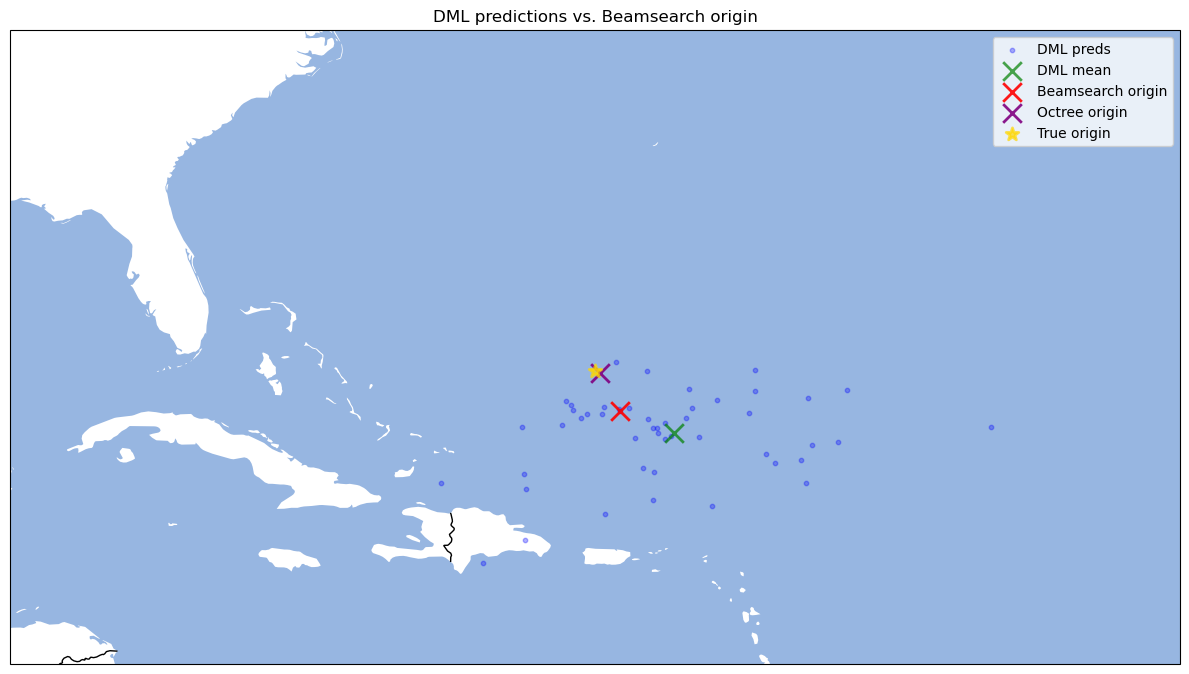

origin lat:     24.5538740275
dml_mean  lat:  22.456714816068
beamsearch lat: 23.193933198828198
origin lon:     -66.8318468125
dml_mean  lon:  -64.13249959664
beamsearch lon: -65.97383355127442


In [23]:
import matplotlib.pyplot as plt
from statistics import mean
import cartopy
from dateutil import parser

origin_time = bulletin.loc[0,"ORIG_TIME"]
origin_lon = bulletin.loc[0,"ORIG_LON"]
origin_lat = bulletin.loc[0,"ORIG_LAT"]
dml_lat_mean = mean(dml_predictions.LAT_ORIG)
dml_lon_mean = mean(dml_predictions.LON_ORIG)
beamsearch_lon = beam_result['unscaled_centroid'][0]
beamsearch_lat = beam_result['unscaled_centroid'][1]
beamsearch_time = parser.parse(beam_result['time'])

octree_lon = octree_result['unscaled_loc'][0]
octree_lat = octree_result['unscaled_loc'][1]

plt.rcParams['figure.figsize'] = [12,12]
geo_axes = plt.axes(projection=cartopy.crs.PlateCarree())
geo_axes.add_feature(cartopy.feature.BORDERS)
geo_axes.add_feature(cartopy.feature.OCEAN)
geo_axes.scatter(dml_predictions['LON_ORIG'], dml_predictions['LAT_ORIG'], marker='.', s=40, linewidth=1, c='b', alpha=0.3, label="DML preds")
geo_axes.scatter(dml_lon_mean, dml_lat_mean, marker='x', linewidth=2, c='g', s=180, alpha=0.7, label="DML mean")
geo_axes.scatter(beamsearch_lon, beamsearch_lat, marker='x', linewidth=2, c='r', s=180, alpha=0.9, label="Beamsearch origin")
geo_axes.scatter(octree_lon, octree_lat, marker='x', linewidth=2, c='purple', s=180, alpha=0.9, label="Octree origin")
geo_axes.scatter(origin_lon, origin_lat, marker='*', linewidth=2, c='gold', s=90, alpha=0.7, label="True origin")
#geo_axes.set_global()
geo_axes.set_extent((origin_lon-20, origin_lon+20, origin_lat-10, origin_lat+10))

plt.title("DML predictions vs. Beamsearch origin")
plt.legend()
plt.tight_layout()
plt.show()

print("origin lat:    ", origin_lat)
print("dml_mean  lat: ", dml_lat_mean)
print("beamsearch lat:", beamsearch_lat)

print("origin lon:    ", origin_lon)
print("dml_mean  lon: ", dml_lon_mean)
print("beamsearch lon:", beamsearch_lon)

# Comparing 3, 4, and 5 station DML models

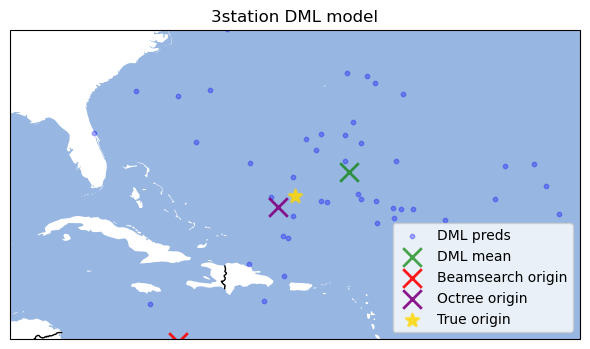

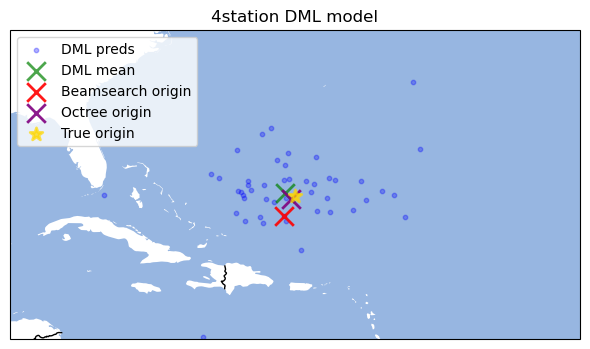

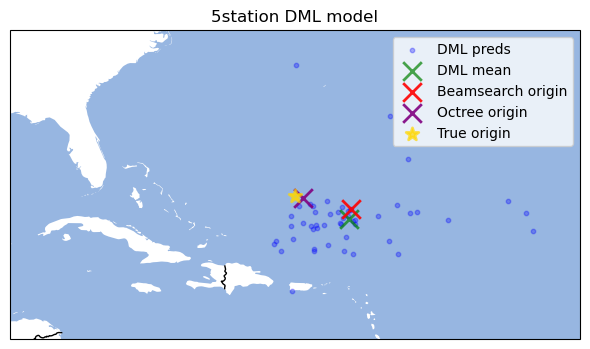

In [36]:
station_counts = [3, 4, 5]

for station_count in station_counts:
    randl.set_dml_sta_count(station_count)
    randl.set_dml_exclude_duplicate_stations(True)

    dml_predictions = randl.dml_prediction(window)

    randl.set_beamwidth(station_count)
    beam_result = randl.beamsearch(window, dml_predictions)

    beam_x = beam_result['scaled_centroid'][0]
    beam_y = beam_result['scaled_centroid'][1]
    beam_z = beam_result['scaled_centroid'][2]
    beam_time = beam_result['time']

    octree_result = randl.octree_search(bulletin, beam_x, beam_y, beam_z, beam_time)

    dml_lat_mean = mean(dml_predictions.LAT_ORIG)
    dml_lon_mean = mean(dml_predictions.LON_ORIG)
    beamsearch_lon = beam_result['unscaled_centroid'][0]
    beamsearch_lat = beam_result['unscaled_centroid'][1]
    beamsearch_time = parser.parse(beam_result['time'])

    octree_lon = octree_result['unscaled_loc'][0]
    octree_lat = octree_result['unscaled_loc'][1]

    plt.rcParams['figure.figsize'] = [6,6]
    geo_axes = plt.axes(projection=cartopy.crs.PlateCarree())
    geo_axes.add_feature(cartopy.feature.BORDERS)
    geo_axes.add_feature(cartopy.feature.OCEAN)
    geo_axes.scatter(dml_predictions['LON_ORIG'], dml_predictions['LAT_ORIG'], marker='.', s=40, linewidth=1, c='b', alpha=0.3, label="DML preds")
    geo_axes.scatter(dml_lon_mean, dml_lat_mean, marker='x', linewidth=2, c='g', s=180, alpha=0.7, label="DML mean")
    geo_axes.scatter(beamsearch_lon, beamsearch_lat, marker='x', linewidth=2, c='r', s=180, alpha=0.9, label="Beamsearch origin")
    geo_axes.scatter(octree_lon, octree_lat, marker='x', linewidth=2, c='purple', s=180, alpha=0.9, label="Octree origin")
    geo_axes.scatter(origin_lon, origin_lat, marker='*', linewidth=2, c='gold', s=90, alpha=0.7, label="True origin")
    #geo_axes.set_global()
    geo_axes.set_extent((origin_lon-20, origin_lon+20, origin_lat-10, origin_lat+10))

    plt.title(str(station_count) + "station DML model")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Full bulletin association
### 10 hour bulletin with 10 events from 100 stations

In [37]:
randl.set_bulletin_start('2024-05-01T00:00:00')
randl.set_bulletin_end('2024-05-02T00:00:00')
randl.set_bulletin_n_stations(100)
randl.set_bulletin_n_events(10)
randl.set_bulletin_drop_fraction(0.2)
randl.set_bulletin_seed(23)

bulletin = randl.create_bulletin()

### Full bulletin association with both beamsearch and octree refinement

After performing the full bulletin association with beamsearch and then refining those results with octree, the ARIDs for valid inlier associations are excluded from the bulletin and the process repeats until all arrivals have been associated.

This function only requires the arrival bulletin, and will use currently set Randl parameters for all other function calls.

Returns two dataframes: beamsearch origin predictions and the refined octree results.

In [38]:
beamsearch_results, octree_results = randl.octree_bulletin_association(bulletin, exclude_associated_phases=True, 
                                                                       travel_time=600, verbose=False)

---------Octree bulletin association---------
---Iteration: 0 ---
404 arrivals remain in bulletin
29 origins found in bulletin.
---Iteration: 1 ---
10 arrivals remain in bulletin
Parser must be a string or character stream, not int64
Parser must be a string or character stream, not int64
Parser must be a string or character stream, not int64
Parser must be a string or character stream, not int64
Parser must be a string or character stream, not int64
Parser must be a string or character stream, not int64
Parser must be a string or character stream, not int64
Parser must be a string or character stream, not int64
Parser must be a string or character stream, not int64
Parser must be a string or character stream, not int64
0 origins found in bulletin.


In [39]:
print("Beamsearch found", len(beamsearch_results), "origins. The original bulletin contained 10 events and", 
      len(bulletin), "arrivals.")

print("Iterative Octree refinement with ARID exclusion found", len(octree_results), "origins, refined from the", 
      len(beamsearch_results), "beamsearch origins.")

Beamsearch found 29 origins. The original bulletin contained 10 events and 404 arrivals.
Iterative Octree refinement with ARID exclusion found 10 origins, refined from the 29 beamsearch origins.


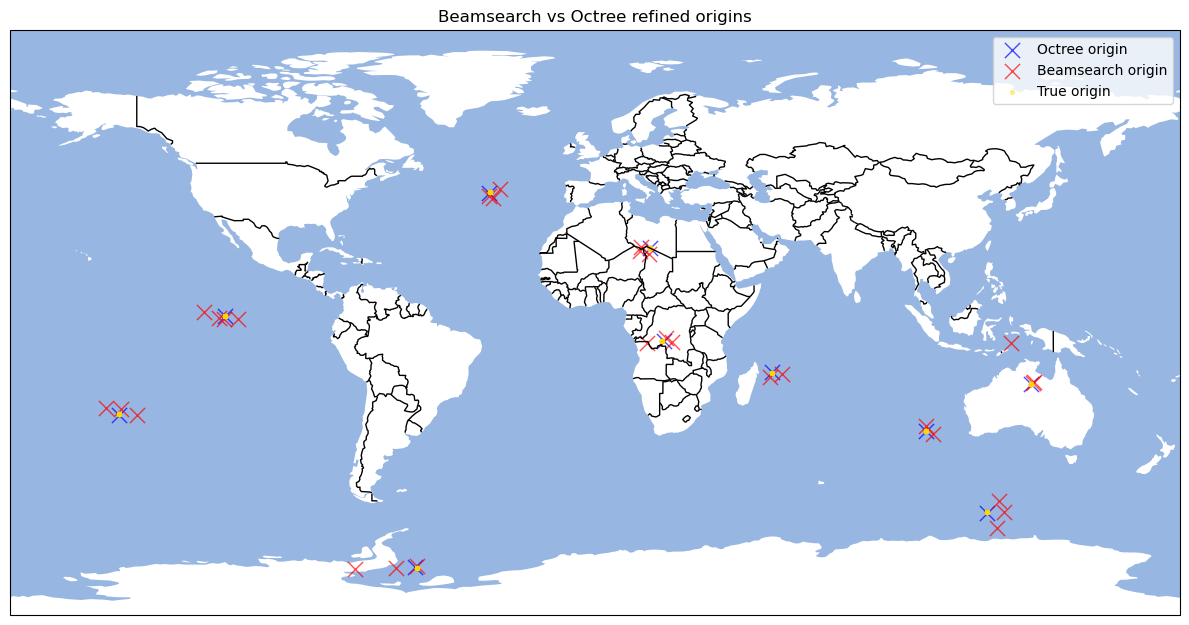

In [40]:
plt.rcParams['figure.figsize'] = [12,12]

geo_axes = plt.axes(projection=cartopy.crs.PlateCarree())
geo_axes.add_feature(cartopy.feature.BORDERS)
geo_axes.add_feature(cartopy.feature.OCEAN)
geo_axes.scatter(octree_results.lon, octree_results.lat, marker='x', linewidth=1, c='b', s=120, alpha=0.7, label="Octree origin")
geo_axes.scatter(beamsearch_results.Beamsearch_lon, beamsearch_results.Beamsearch_lat, marker='x', linewidth=1, c='r', s=120, alpha=0.7, label="Beamsearch origin")
geo_axes.scatter(bulletin.ORIG_LON, bulletin.ORIG_LAT, marker='.', linewidth=1, c='gold', s=30, alpha=0.4, label="True origin")
geo_axes.set_global()

plt.title("Beamsearch vs Octree refined origins")
plt.legend()
plt.tight_layout()
plt.show()

### Utility functions, scaling, Octree surrogate models

In [162]:
randl.constants()

{'Earth radius': 6378.137}

In [163]:
randl.lonlat_to_geocentric(22, 15, 9)

{'x': 5713490.291534261, 'y': 2308399.918834397, 'z': 1640102.4695672975}

In [164]:
randl.geocentric_to_lonlat(5713490.291534261, 2308399.918834397, 1640102.4695672975)

{'lon': 22.0, 'lat': 14.999999999999995, 'elev': 9.0}

In [165]:
randl.scale_time(65.2)

{'scaled_time': 0.07244444444444445}

In [166]:
randl.unscale_time(0.07244444444444445)

{'unscaled_time': 65.2}

In [167]:
randl.scale_geocentric(44444,33333,55555)

{'x': 0.0069681789525686405,
 'y': 0.005226134214426453,
 'z': 0.008710223690710828}

In [168]:
randl.unscale_geocentric(0.0069681789525686405, 0.005226134214426453, 0.008710223690710828)

{'x': 44444.0, 'y': 33333.0, 'z': 55555.0}

In [169]:
inputs = [[0.15318064, -0.1910636 , -0.9663009 , -0.7103696 , 0.49366274, -0.28269523], [0.15328064, -0.1230636 , -0.9443009 , -0.7103696 ,  0.49366274, -0.33369523]]
result = randl.taup_surrogate(inputs)
result

{'predictions': [0.7754557132720947, 0.7543653845787048]}

In [170]:
randl.baz_surrogate(inputs)

{'predictions': [-0.9549453854560852,
  -0.2548316717147827,
  -0.9923339486122131,
  -0.06697148084640503]}

In [171]:
source_lat, source_lon = 34.05, -118.25  # Los Angeles, CA
st_lat, st_lon = 37.77, -122.42  # San Francisco, CA

randl.baz_geo_surrogate(source_lat, source_lon, st_lat, st_lon)

{'baz_cos': -0.7241238454468915, 'baz_sin': 0.6896699619783412}